In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("./results.html") as fp:
    soup = BeautifulSoup(fp, 'html.parser')

In [3]:
trs = soup.find_all('tr')
df = pd.DataFrame()

for i in range(0, len(trs)):
    try:
        df.at[i, "botName"] = trs[i].find_all("div", {"class": "truncate block"})[0].text

        numbers = re.findall(r'\d+', trs[i].find_all('div', text = "Amount")[0].parent.findChildren("div")[1].text)
        finalNumber = numbers[0] + "." + numbers[1]
        df.at[i, "Amount"] = float(finalNumber)

        df.at[i, "Percent"] = float(trs[i].find_all('div', text = "PnL")[0].parent.findChildren()[3].text.replace("%", ""))
        df.at[i, "USDT"] = float(trs[i].find_all('div', text = "PnL")[0].parent.findChildren()[2].text.replace(" USDT", ""))
        df.at[i, "scaledUSDT"] = float(trs[i].find_all('div', text = "PnL")[0].parent.findChildren()[2].text.replace(" USDT", "")) * 20

        hM = 0
        dM = 0
        mM = int(re.search("(\d)", re.search(r"(\d)m", trs[i].find_all('div', text = "Duration")[0].parent.findChildren()[3].text)[0])[0])

        try:
            dM = int(re.search("(\d)", re.search(r"(\d)d", trs[i].find_all('div', text = "Duration")[0].parent.findChildren()[3].text)[0])[0]) * 24 * 60
        except:
            None

        try:
            hM = int(re.search("(\d)", re.search(r"(\d)h", trs[i].find_all('div', text = "Duration")[0].parent.findChildren()[3].text)[0])[0]) * 60
        except:
            None

        

        df.at[i, "time"] = dM + hM + mM
    except:
        None

df

,botName,Amount,Percent,USDT,scaledUSDT,time
0,Premium Strategy of Kuresofa (Regular Profit),1.458,2.8,0.55,11.0,184.0
1,AI Portfolio - Spot Trading,87.912,10.0,3.49,69.8,65.0
2,SOL Strategy of Kuresofa,1.278,3.7,2.56,51.2,122.0
3,AI Portfolio - Spot Trading,12.406,5.0,3.50,70.0,483.0
4,AI Portfolio - Spot Trading,37.162,10.0,0.99,19.8,8885.0
...,...,...,...,...,...,...
744,CIDA’s Rapid Signals,1.897,1.4,0.54,10.8,4.0
745,CIDA’s Rapid Signals,31.000,-0.2,-0.03,-0.6,1.0
746,CIDA’s Rapid Signals,935.400,-0.5,-0.10,-2.0,3.0
747,CIDA’s Rapid Signals,2.800,-0.3,-0.06,-1.2,5.0


In [19]:
df.groupby("botName", as_index = True).mean().sort_values("Percent", ascending = False)

KeyError: 'botname'

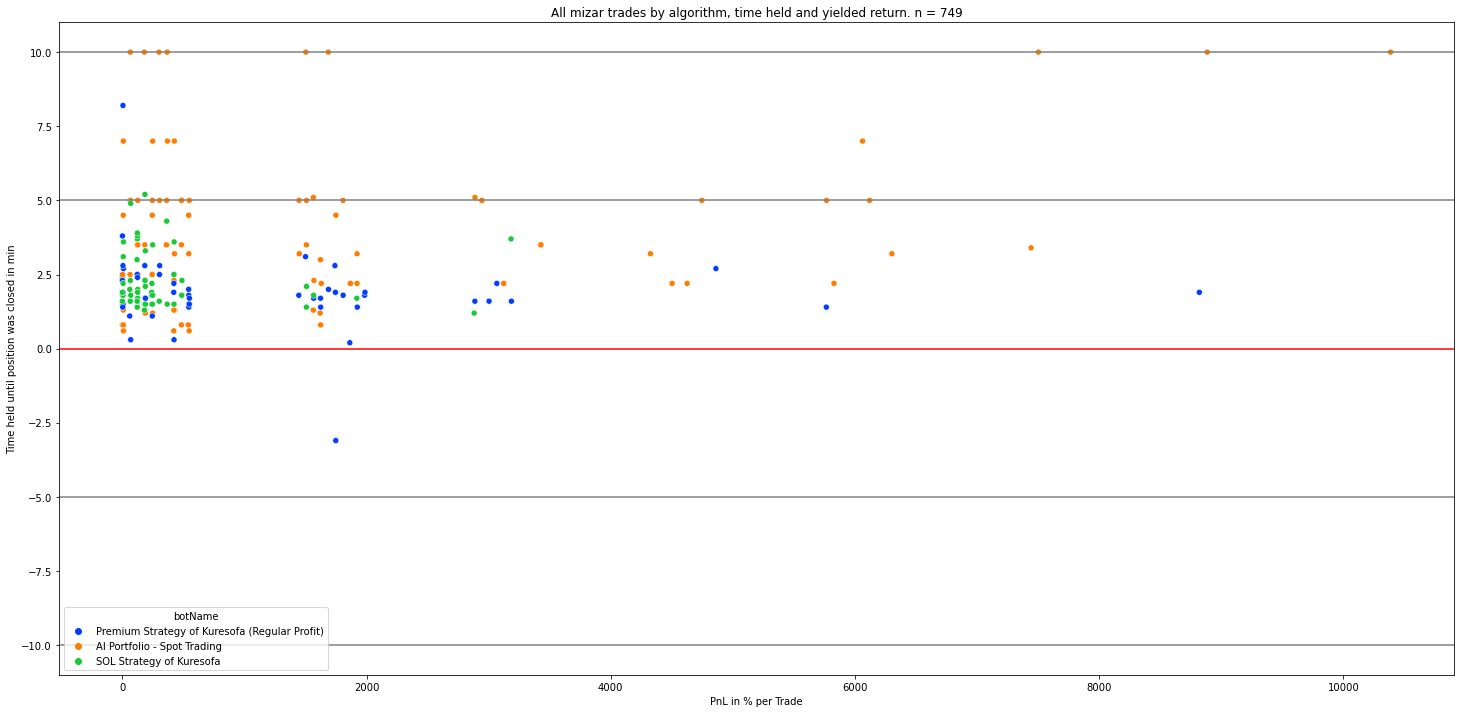

In [10]:
include = ["AI Portfolio - Spot Trading",
           "Premium Strategy of Kuresofa (Regular Profit)",
           "SOL Strategy of Kuresofa"]

cdf = df.copy()
cdf = cdf[cdf["botName"].isin(include)]
g = sns.scatterplot(data = cdf, x = "time", y = "Percent", sizes = 10, hue = "botName", palette = "bright")
g.figure.set_size_inches(25, 12)
g.set(xlabel='PnL in % per Trade', ylabel='Time held until position was closed in min', title = "All mizar trades by algorithm, time held and yielded return. n = " + str(len(df)))
lc = "grey"
plt.axhline(y=0, color = "red") 
plt.axhline(y=5, color = lc) 
plt.axhline(y=-5, color = lc) 
plt.axhline(y=10, color = lc) 
plt.axhline(y=-10, color = lc) 

In [6]:
df.to_json("data.json")